# Disjoint-set

Disjoint-set(also called union-find set) is a special data structure for checking if two elements belong to the same set and merging two sets into one.

## Disjoint-set forest

If we put each element into one set, then we get a disjoint-set forest, this is the initial state.

Each element maintains a reference that pointer to its parent element. If the pointer is null, then this element is the root of the set it belongs to. Initially, all the potiners are null.

## Find

At this step, we find the root element of a given element. The root element stands for the set of the given element belongs to.

## Union

Merge two sets into one set. Usually, we give two elements which belongs to two sets, then the algorithm merge one set into another set.

## Optimize

If the set tree is unbalanced,  the find operation will cost a lot of time. So, we can do the path compression during the find operation. That is, we set all the references of all the elements in the query path to the root element of the set.

In [1]:
import algviz

class DisjointSet:
    def __init__(self, nums):
        self.viz = algviz.Visualizer(1)
        self.sets = self.viz.createGraph()
        self.log1 = self.viz.createLogger(1, None, 16, False)
        self.log2 = self.viz.createLogger(1, None, 16, False)
        self.num2elem = dict()
        for x in nums:
            elem = algviz.TreeNode(x)
            self.num2elem[x] = elem
            self.sets.addNode(elem)
            elem.parent = None
        self.viz.display()

    def find(self, x):
        elem = self.num2elem[x]
        self.sets.markNode(algviz.cLime, elem)
        self.viz.display(0.5)
        if elem.parent == None:
            self.sets.markNode(algviz.cTomato, elem, True)
            self.viz.display(0.5)
            return elem.val
        else:
            res = self.find(elem.parent.val)
            new_parent = self.num2elem[res]
            if elem.parent != new_parent:
                self.log2.write('Compress path: {} -> {}'.format(elem.val, new_parent.val))
                elem.parent.remove(elem)
                elem.parent = new_parent
                elem.parent.add(elem)
            self.viz.display()
            self.log2.write('')
            return res

    def union(self, x, y):
        self.log1.write('Union: {} <=> {}'.format(x, y))
        root1 = self.num2elem[self.find(x)]
        root2 = self.num2elem[self.find(y)]
        self.sets.removeMark(algviz.cTomato)
        if root1 != root2:
            root1.parent = root2
            root2.add(root1)
            self.viz.display()

You can try to change the numbers in the `elements` and the union operations in the `union_list` to see what will happen.

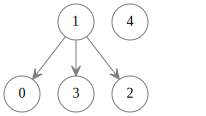

In [2]:
elements = [0, 1, 2, 3, 4]
union_list = [(0, 1), (2, 3), (3, 1), (4, 2)]
diset = DisjointSet(elements)
for (x, y) in union_list:
    diset.union(x, y)

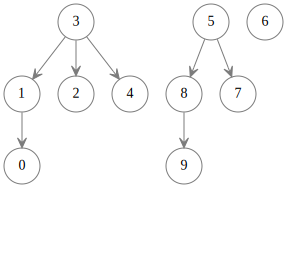

In [3]:
elements = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
union_list = [
    (0, 1), (2, 3), (4, 3), (0, 4),             # Set0: (0, 1, 2, 3, 4)
    (7, 8), (9, 8), (9, 5), (7, 6)              # Set1: (5, 6, 7, 8, 9)
]
diset = DisjointSet(elements)
for (x, y) in union_list:
    diset.union(x, y)